In [1]:
pip install yfinance

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.10/bin/python3.10 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pandas-datareader

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.10/bin/python3.10 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline


In [4]:
# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr
yf.pdr_override()


In [5]:
# For time stamps
from datetime import datetime


# The tech stocks for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN', 'NFLX', 'TSLA']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
    

company_list = [AAPL, GOOG, MSFT, AMZN, NFLX, TSLA]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON", "NETFLIX", "TESLA"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [6]:
df = pd.concat(company_list, axis=0)
df.tail(10)

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2024-04-05,169.080002,170.860001,160.509995,164.899994,164.899994,141250700,TESLA
2024-04-08,169.339996,174.500000,167.789993,172.979996,172.979996,104423300,TESLA
2024-04-09,172.910004,179.220001,171.919998,176.880005,176.880005,103232700,TESLA
2024-04-10,173.039993,174.929993,170.009995,171.759995,171.759995,84532400,TESLA
2024-04-11,172.550003,175.880005,168.509995,174.600006,174.600006,94516000,TESLA
2024-04-12,172.339996,173.809998,170.360001,171.050003,171.050003,64506600,TESLA
2024-04-15,170.240005,170.690002,161.380005,161.479996,161.479996,100245300,TESLA
2024-04-16,156.740005,158.190002,153.750000,157.110001,157.110001,97000000,TESLA
2024-04-17,157.639999,158.330002,153.779999,155.449997,155.449997,82439700,TESLA


### Descriptive Statistics about the Data
.describe() generates descriptive statistics of each stock. Descriptive statistics include those that summarize the central tendency, dispersion, and shape of a dataset’s distribution, excluding NaN values.

Analyzes both numeric and object series, as well as DataFrame column sets of mixed data types. The output will vary depending on what is provided.

In [7]:
# Summary Stats
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,180.996206,182.464585,179.650593,181.118973,180.702876,5.775582e+07
std,8.891545,8.738406,8.831570,8.816747,8.823685,1.760458e+07
min,163.059998,165.279999,162.800003,163.759995,162.890533,2.404830e+07
25%,173.149994,174.589996,171.960007,173.570007,173.210495,4.677800e+07
50%,180.089996,181.929993,178.330002,180.570007,179.859726,5.366560e+07
75%,189.259995,189.990005,187.610001,189.300003,188.850006,6.384130e+07
max,198.020004,199.619995,197.000000,198.110001,197.857529,1.366826e+08


In [8]:
GOOG.describe()

,Open,High,Low,Close,Adj Close,Volume
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,133.599384,135.079028,132.434767,133.787846,133.787846,2.300833e+07
std,12.205864,12.191813,12.181013,12.221867,12.221867,8.401628e+06
min,104.214996,105.724998,103.269997,104.449997,104.449997,8.828600e+06
25%,125.129997,126.559998,123.790001,125.230003,125.230003,1.773000e+07
50%,134.544998,135.820007,132.860001,134.589996,134.589996,2.078190e+07
75%,140.750000,142.270004,139.789993,140.990005,140.990005,2.495390e+07
max,160.279999,161.699997,158.600006,160.789993,160.789993,5.879610e+07


In [9]:
MSFT.describe()

,Open,High,Low,Close,Adj Close,Volume
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,357.149328,360.153163,354.051423,357.210396,356.023653,2.482161e+07
std,39.007700,38.896607,38.751709,38.920451,39.597822,9.527489e+06
min,279.510010,281.600006,275.369995,275.420013,273.177917,1.017660e+07
25%,327.799988,330.910004,324.510010,327.760010,326.428802,1.937090e+07
50%,340.540009,346.200012,337.619995,342.329987,340.285492,2.236080e+07
75%,393.660004,394.029999,390.119995,393.869995,393.142975,2.700990e+07
max,429.829987,430.820007,427.160004,429.369995,429.369995,7.847820e+07


In [10]:
AMZN.describe()

,Open,High,Low,Close,Adj Close,Volume
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,142.524229,144.112648,141.043676,142.636364,142.636364,5.212879e+07
std,21.673529,21.678252,21.604622,21.685905,21.685905,1.952176e+07
min,101.470001,103.900002,101.150002,102.050003,102.050003,2.237840e+07
25%,128.199997,129.770004,126.410004,128.210007,128.210007,4.138460e+07
50%,138.750000,139.960007,137.100006,138.229996,138.229996,4.826000e+07
75%,154.850006,156.199997,153.119995,154.779999,154.779999,5.839890e+07
max,187.720001,189.770004,185.509995,189.050003,189.050003,1.529387e+08


In [11]:
NFLX.describe()

,Open,High,Low,Close,Adj Close,Volume
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,461.294861,467.119328,455.690870,461.312412,461.312412,5.490633e+06
std,87.755749,88.185091,86.905196,87.606554,87.606554,3.854681e+06
min,317.549988,323.609985,315.619995,317.549988,317.549988,1.404700e+06
25%,404.739990,410.209991,398.519989,403.130005,403.130005,3.368000e+06
50%,439.739990,445.250000,434.350006,440.489990,440.489990,4.440600e+06
75%,492.540009,498.959991,488.390015,492.160004,492.160004,6.157500e+06
max,636.390015,639.000000,628.109985,636.179993,636.179993,2.807440e+07


In [12]:
TSLA.describe()

,Open,High,Low,Close,Adj Close,Volume
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,221.040712,225.184269,216.812134,221.109763,221.109763,1.179574e+08
std,36.897120,37.424144,36.306148,36.873616,36.873616,2.596797e+07
min,151.250000,152.199997,148.699997,149.929993,149.929993,6.450660e+07
25%,185.500000,188.889999,182.110001,185.770004,185.770004,1.015433e+08
50%,229.339996,235.229996,225.380005,231.279999,231.279999,1.136020e+08
75%,251.449997,257.970001,247.289993,252.539993,252.539993,1.315309e+08
max,296.040009,299.290009,289.519989,293.339996,293.339996,2.117971e+08


### Information About the Data
.info() method prints information about a DataFrame including the index dtype and columns, non-null values, and memory usage

In [13]:
# General info
AAPL.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2023-04-18 to 2024-04-18
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          253 non-null    float64
 1   High          253 non-null    float64
 2   Low           253 non-null    float64
 3   Close         253 non-null    float64
 4   Adj Close     253 non-null    float64
 5   Volume        253 non-null    int64  
 6   company_name  253 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB


In [14]:
GOOG.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2023-04-18 to 2024-04-18
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          253 non-null    float64
 1   High          253 non-null    float64
 2   Low           253 non-null    float64
 3   Close         253 non-null    float64
 4   Adj Close     253 non-null    float64
 5   Volume        253 non-null    int64  
 6   company_name  253 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB


In [15]:
MSFT.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2023-04-18 to 2024-04-18
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          253 non-null    float64
 1   High          253 non-null    float64
 2   Low           253 non-null    float64
 3   Close         253 non-null    float64
 4   Adj Close     253 non-null    float64
 5   Volume        253 non-null    int64  
 6   company_name  253 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB


In [16]:
AMZN.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2023-04-18 to 2024-04-18
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          253 non-null    float64
 1   High          253 non-null    float64
 2   Low           253 non-null    float64
 3   Close         253 non-null    float64
 4   Adj Close     253 non-null    float64
 5   Volume        253 non-null    int64  
 6   company_name  253 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB


In [17]:
NFLX.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2023-04-18 to 2024-04-18
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          253 non-null    float64
 1   High          253 non-null    float64
 2   Low           253 non-null    float64
 3   Close         253 non-null    float64
 4   Adj Close     253 non-null    float64
 5   Volume        253 non-null    int64  
 6   company_name  253 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB


In [18]:
TSLA.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2023-04-18 to 2024-04-18
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          253 non-null    float64
 1   High          253 non-null    float64
 2   Low           253 non-null    float64
 3   Close         253 non-null    float64
 4   Adj Close     253 non-null    float64
 5   Volume        253 non-null    int64  
 6   company_name  253 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB


We have only 255 records in one year because weekends are not included in the data. The data is consistent over all stocks

## 1. What was the change in price of each stock?

### Closing Price
The closing price is the last price at which the stock is traded during the regular trading day. A stock’s closing price is the standard benchmark used by investors to track its performance over time.

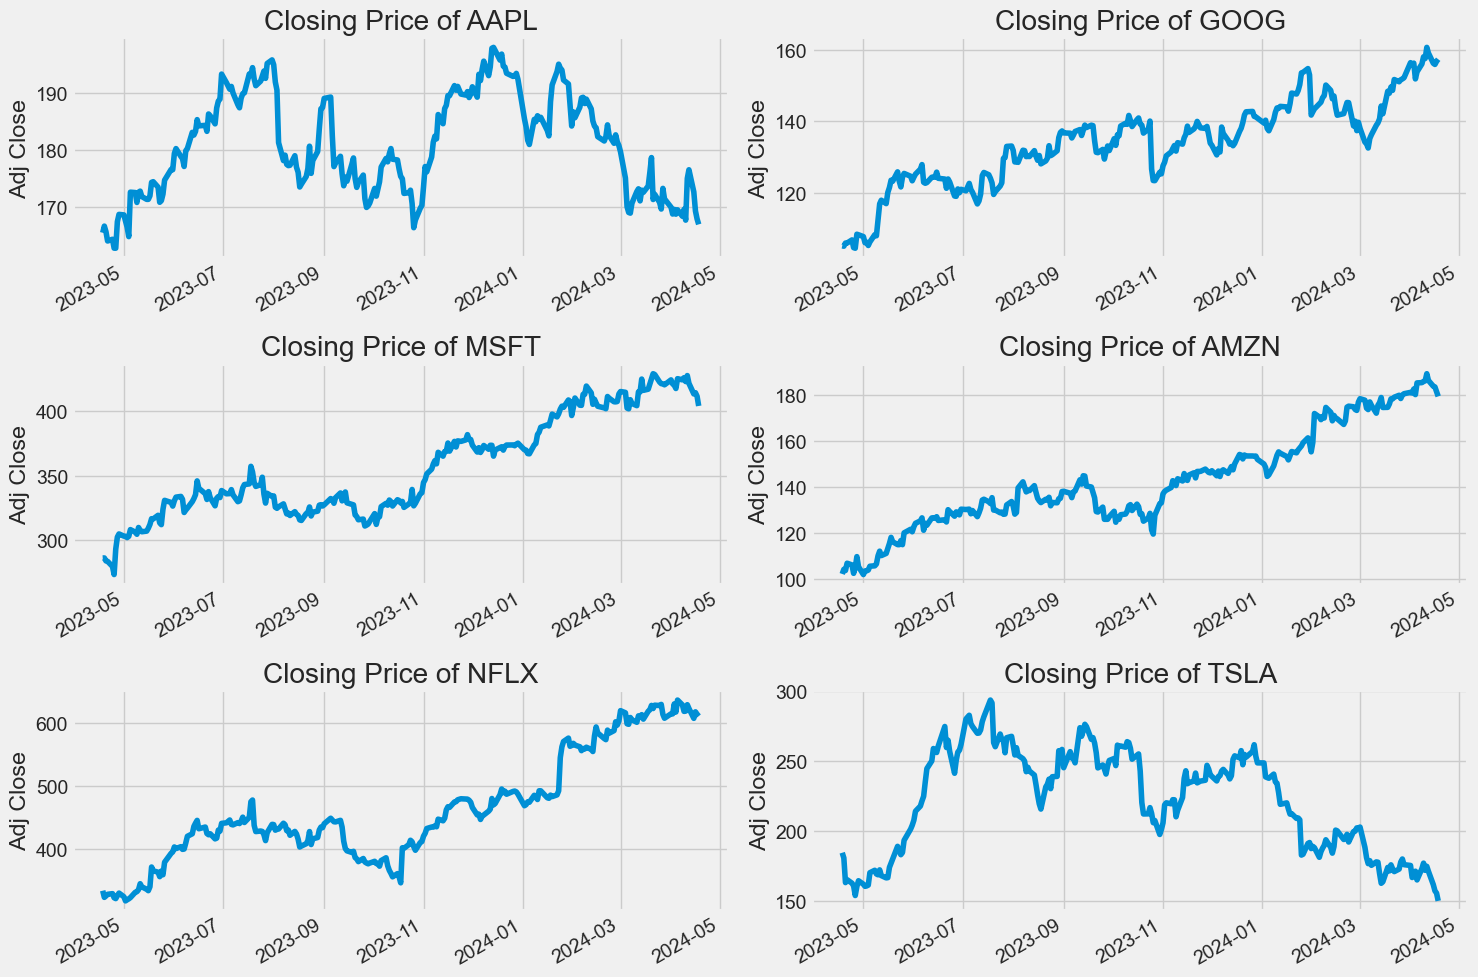

In [19]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(3, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")  
plt.tight_layout()

*** Some useful insights we can see from these charts: 
APL: The stock price fluctuates and shows a peak before dropping towards the end of the period.
GOOG: The stock price shows a general upward trend, with some fluctuations but no significant drops.
MSFT: The stock price exhibits a steady increase with minor fluctuations throughout the period.
AMZN: The stock price shows a consistent upward trend with relatively small fluctuations.
NFLX: The stock price shows a strong upward trend with a significant increase, especially towards the end of the period.
TSLA: The stock price is highly volatile, with sharp increases and decreases, ending on a downward trend.
Overall, except for TSLA, which shows high volatility, and AAPL, which ends on a decline, most of the stocks are trending upward or holding steady through the observed period. NFLX demonstrates the most significant growth among the six.


### Volume of Sales
Volume is the amount of an asset or security that changes hands over some period of time, often over the course of a day. For instance, the stock trading volume would refer to the number of shares of security traded between its daily open and close. Trading volume, and changes to volume over the course of time, are important inputs for technical traders.

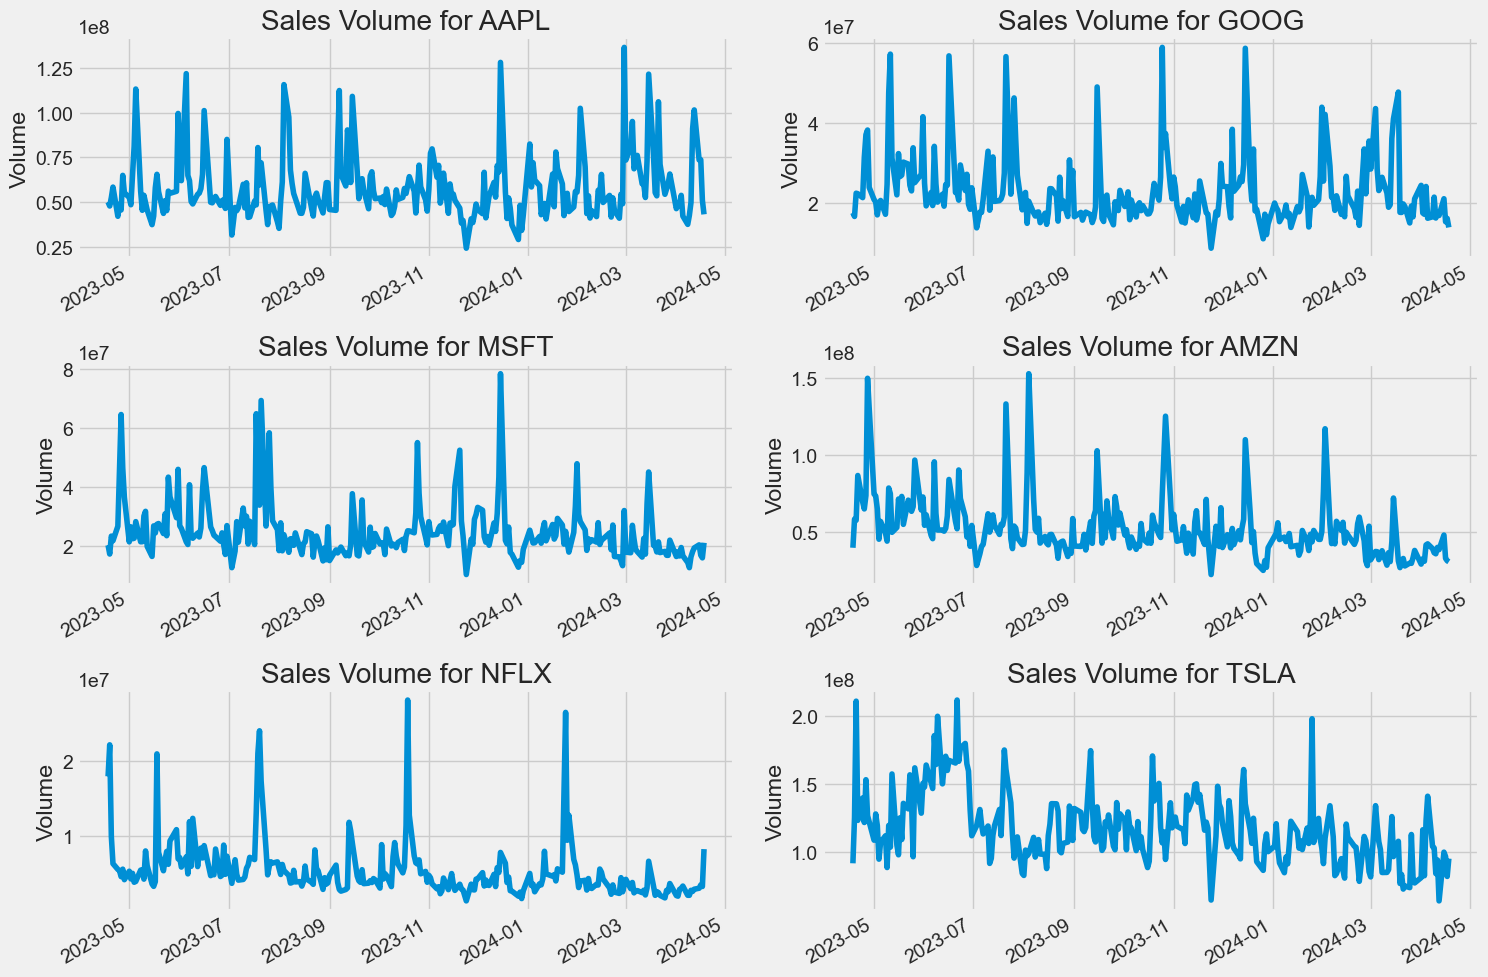

In [20]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(3, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

AAPL: Experiences significant volume spikes throughout the period, with the greatest peaks occurring in early March and late April.
GOOG: Shows several high-volume days with the most notable peaks around mid-March and early April, yet the volume seems to be decreasing towards the end of the period.
MSFT: Displays variable volume, with pronounced spikes in early March and less frequent high-volume days as time progresses.
AMZN: Indicates a declining trend in sales volume with a few spikes, but overall less volume traded towards the end of the period compared to the beginning.
NFLX: Demonstrates several spikes in trade volume, with the most significant peaks in early March, and a general decline in volume towards May.
TSLA: Exhibits high variability in sales volume with several sharp peaks, particularly in early March and mid-April, showing some of the highest volume days among the six companies.


## 2. What was the moving average of the various stocks?
The moving average (MA) is a simple technical analysis tool that smooths out price data by creating a constantly updated average price. The average is taken over a specific period of time, like 1 week (7 days), 1 month (30 days), 3 months (90 days), or any time period the trader chooses.

In [21]:
mavg_day = [7, 30, 90]

for mavg in mavg_day:
    for company in company_list:
        column_name = f"MA for {mavg} days"
        company[column_name] = company['Adj Close'].rolling(mavg).mean()

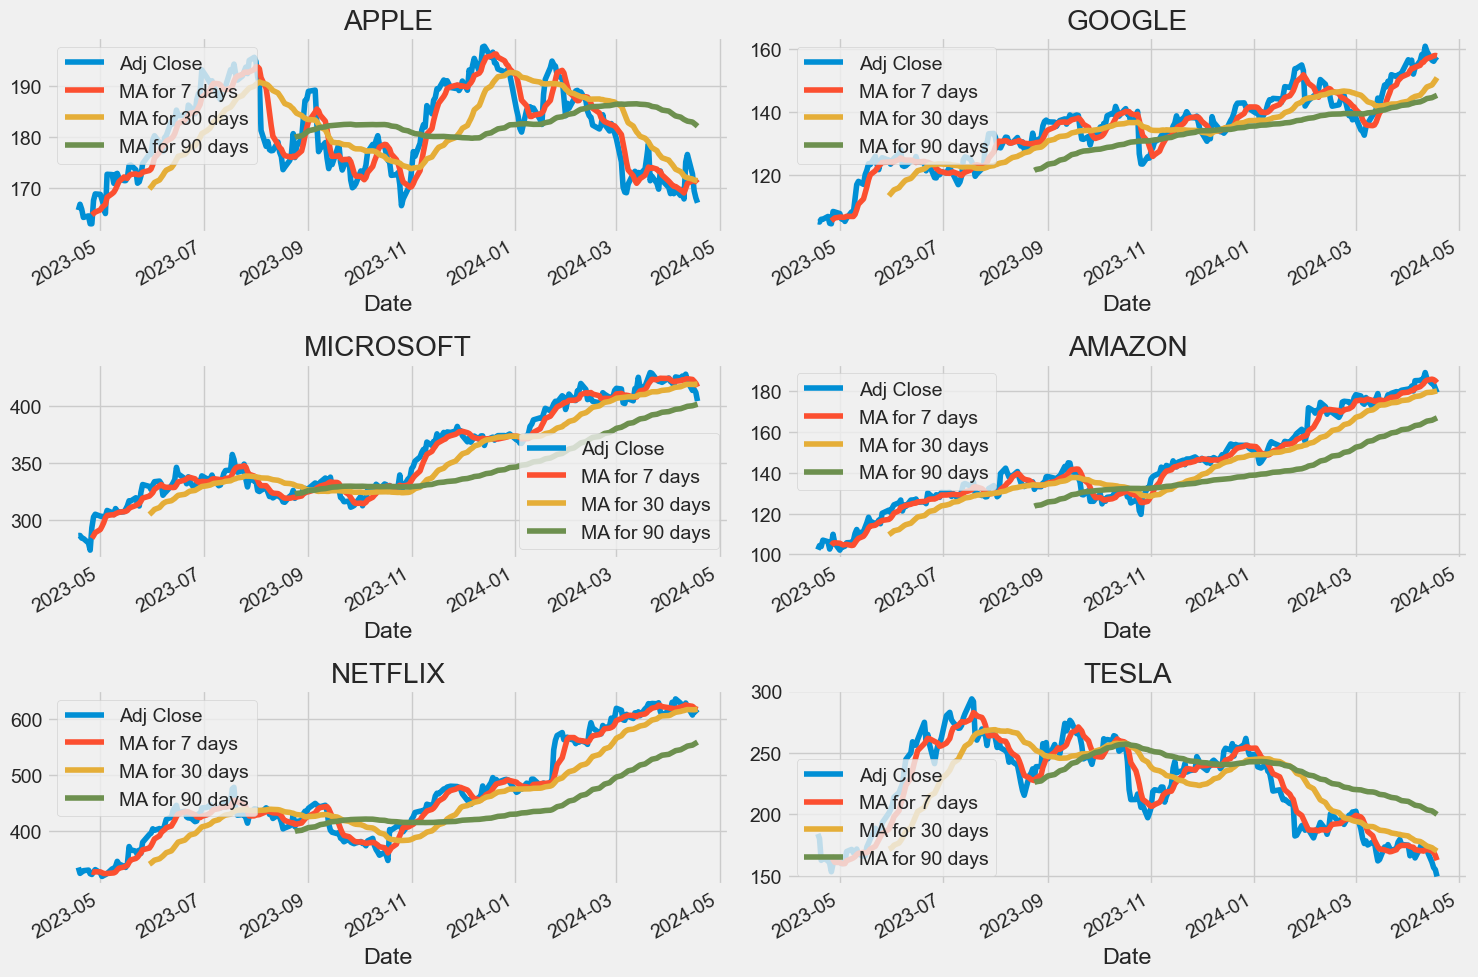

In [22]:
fig, axes = plt.subplots(nrows=3, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 7 days', 'MA for 30 days', 'MA for 90 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 7 days', 'MA for 30 days', 'MA for 90 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 7 days', 'MA for 30 days', 'MA for 90 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 7 days', 'MA for 30 days', 'MA for 90 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

NFLX[['Adj Close', 'MA for 7 days', 'MA for 30 days', 'MA for 90 days']].plot(ax=axes[2,0])
axes[2,0].set_title('NETFLIX')

TSLA[['Adj Close', 'MA for 7 days', 'MA for 30 days', 'MA for 90 days']].plot(ax=axes[2,1])
axes[2,1].set_title('TESLA')

fig.tight_layout()

Positive Momentum:
Google: The uptrend with fluctuations suggests Google's business is growing, but there may be external factors causing temporary setbacks.
Microsoft: The consistent uptrend indicates strong and sustained growth for Microsoft.

Amazon: The uptrend suggests Amazon's business is expanding steadily.

Netflix: The significant growth with a steep upward trajectory implies Netflix is experiencing explosive growth, but it might be unsure if this pace can be maintained.

Negative Momentum:
Tesla: The downtrend suggests investors are losing confidence in Tesla, possibly due to production issues, competition, or other factors.

Neutral:
Apple: The volatility with a downward trend at the end is inconclusive. Apple might be facing temporary headwinds, but without knowing the timeframe of the graphs, it's hard to say for sure.

## 3. What was the daily return of the stock on average?


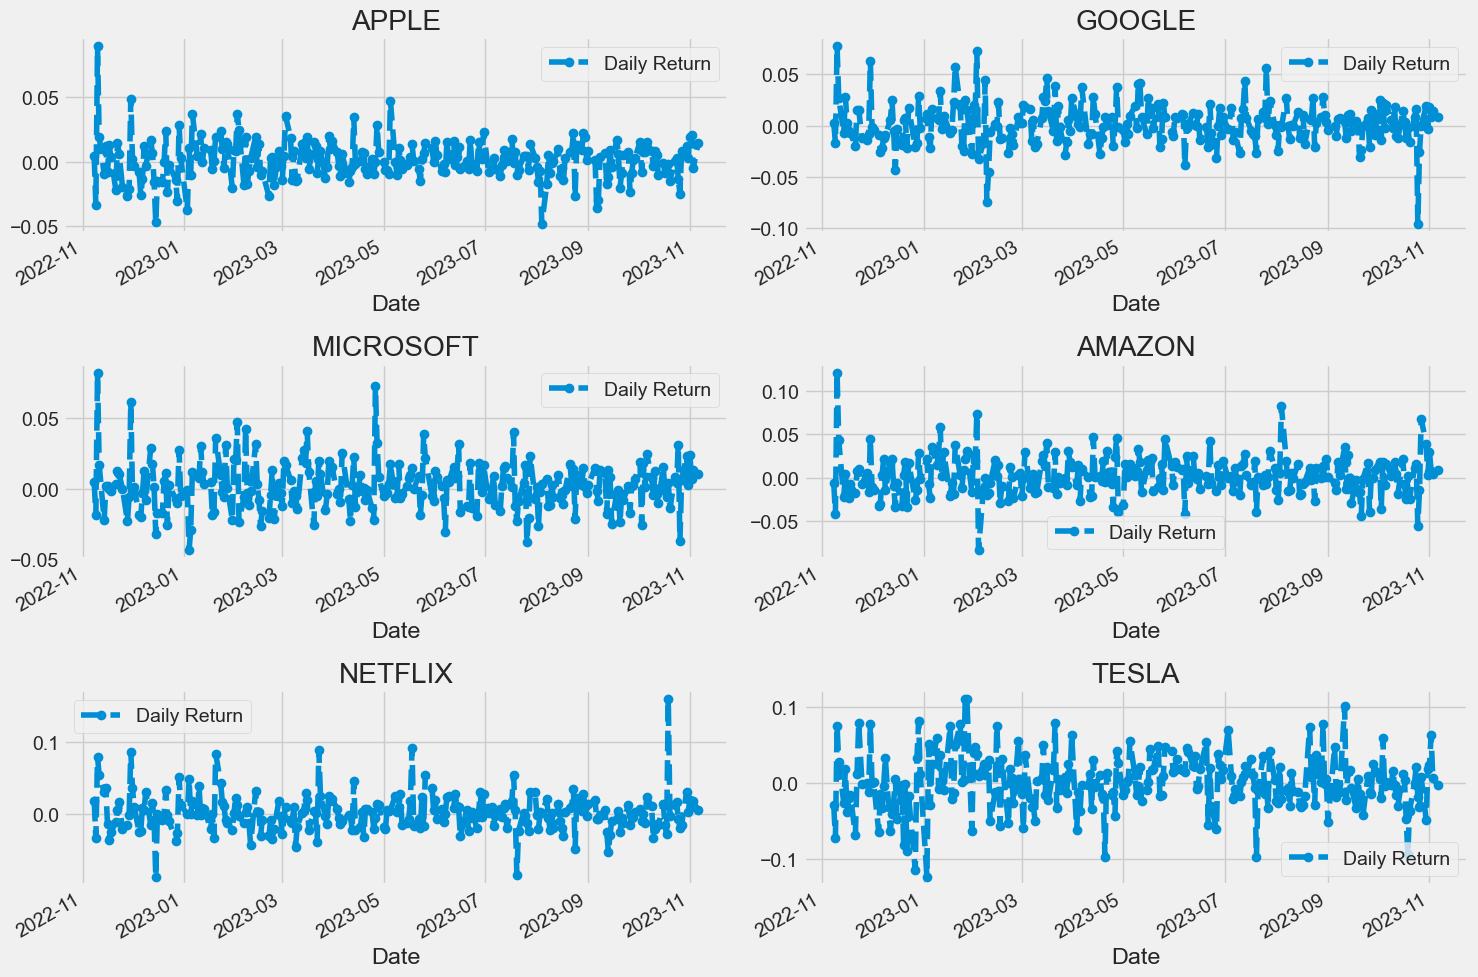

In [10]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=3, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')
NFLX['Daily Return'].plot(ax=axes[2,0], legend=True, linestyle='--', marker='o')
axes[2,0].set_title('NETFLIX')
TSLA['Daily Return'].plot(ax=axes[2,1], legend=True, linestyle='--', marker='o')
axes[2,1].set_title('TESLA')

fig.tight_layout()

Risk and Volatility:

Higher Volatility (Netflix, Tesla): The wider spread of daily returns, with some points exceeding +/- 0.1, suggests Netflix and Tesla are more volatile stocks. This means their prices can fluctuate significantly in a short period, offering potentially higher returns but also greater risk.
Lower Volatility (Apple, Google, Microsoft, Amazon): The tighter clustering around the zero line for these companies indicates lower daily price swings. This translates to potentially steadier returns but also potentially lower growth opportunities in the short term.
Limited Timeframe:

Daily returns only provide a snapshot of short-term price movements. Long-term investment decisions should consider the company's fundamentals, growth potential, and overall market trends.
No Clear Trend:

The absence of a clear upward or downward trend suggests these stocks might not be experiencing a sustained price increase or decrease in the period analyzed. Analyzing longer timeframes and looking for historical trends can give a better picture.

Investment Insights:

Higher volatility stocks (Netflix, Tesla): These might be suitable for investors with a higher risk tolerance who aim for potentially high returns. However, be prepared for significant price swings.
Lower volatility stocks (Apple, Google, Microsoft, Amazon): These could be good options for investors seeking stability and consistent, albeit potentially lower, returns.
Further Research: Daily returns alone are not enough. Dig deeper into each company's financials, news, and long-term outlook to make informed investment decisions.

KeyError: 'Daily Return'

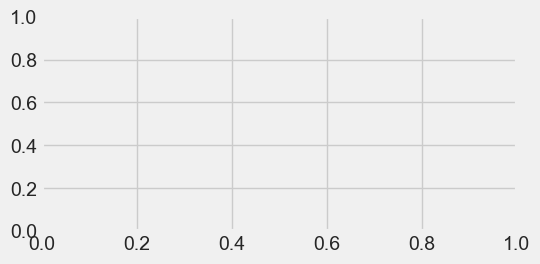

In [24]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(3, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Coun##ts')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

## 4. What was the correlation between different stocks closing prices?

In [25]:
# Grab all the closing prices for the tech stock list into one DataFrame

closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%%**********************]  6 of 6 completed


,AAPL,AMZN,GOOG,MSFT,NFLX,TSLA
Date,,,,,,
2023-04-18,NaN,NaN,NaN,NaN,NaN,NaN
2023-04-19,0.006968,0.019550,-0.000951,0.000278,-0.031705,-0.020183
2023-04-20,-0.005846,-0.004698,0.008379,-0.008112,0.006901,-0.097458
2023-04-21,-0.009781,0.030344,0.000094,-0.001223,0.008084,0.012823
2023-04-24,0.001879,-0.007012,0.008214,-0.013963,0.003171,-0.015326


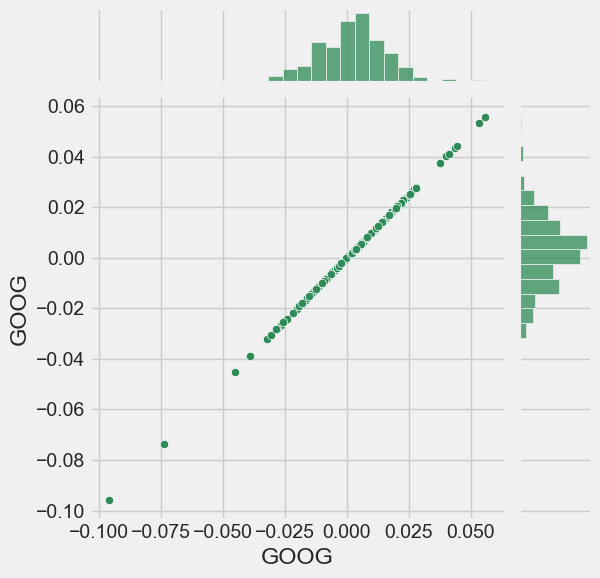

In [26]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')

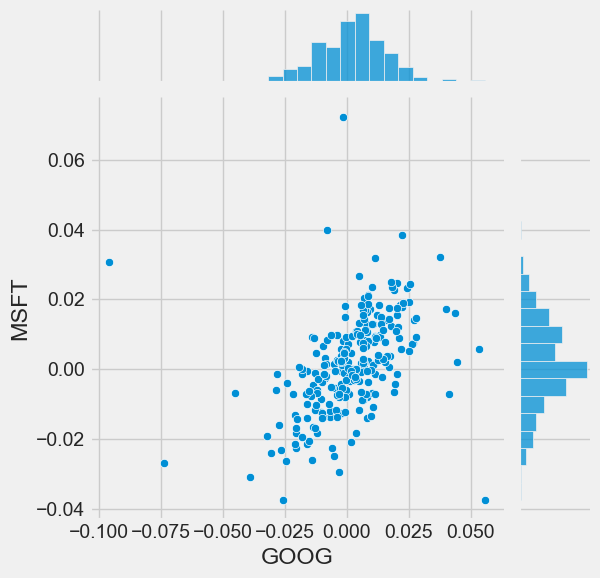

In [27]:
# I'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter')

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


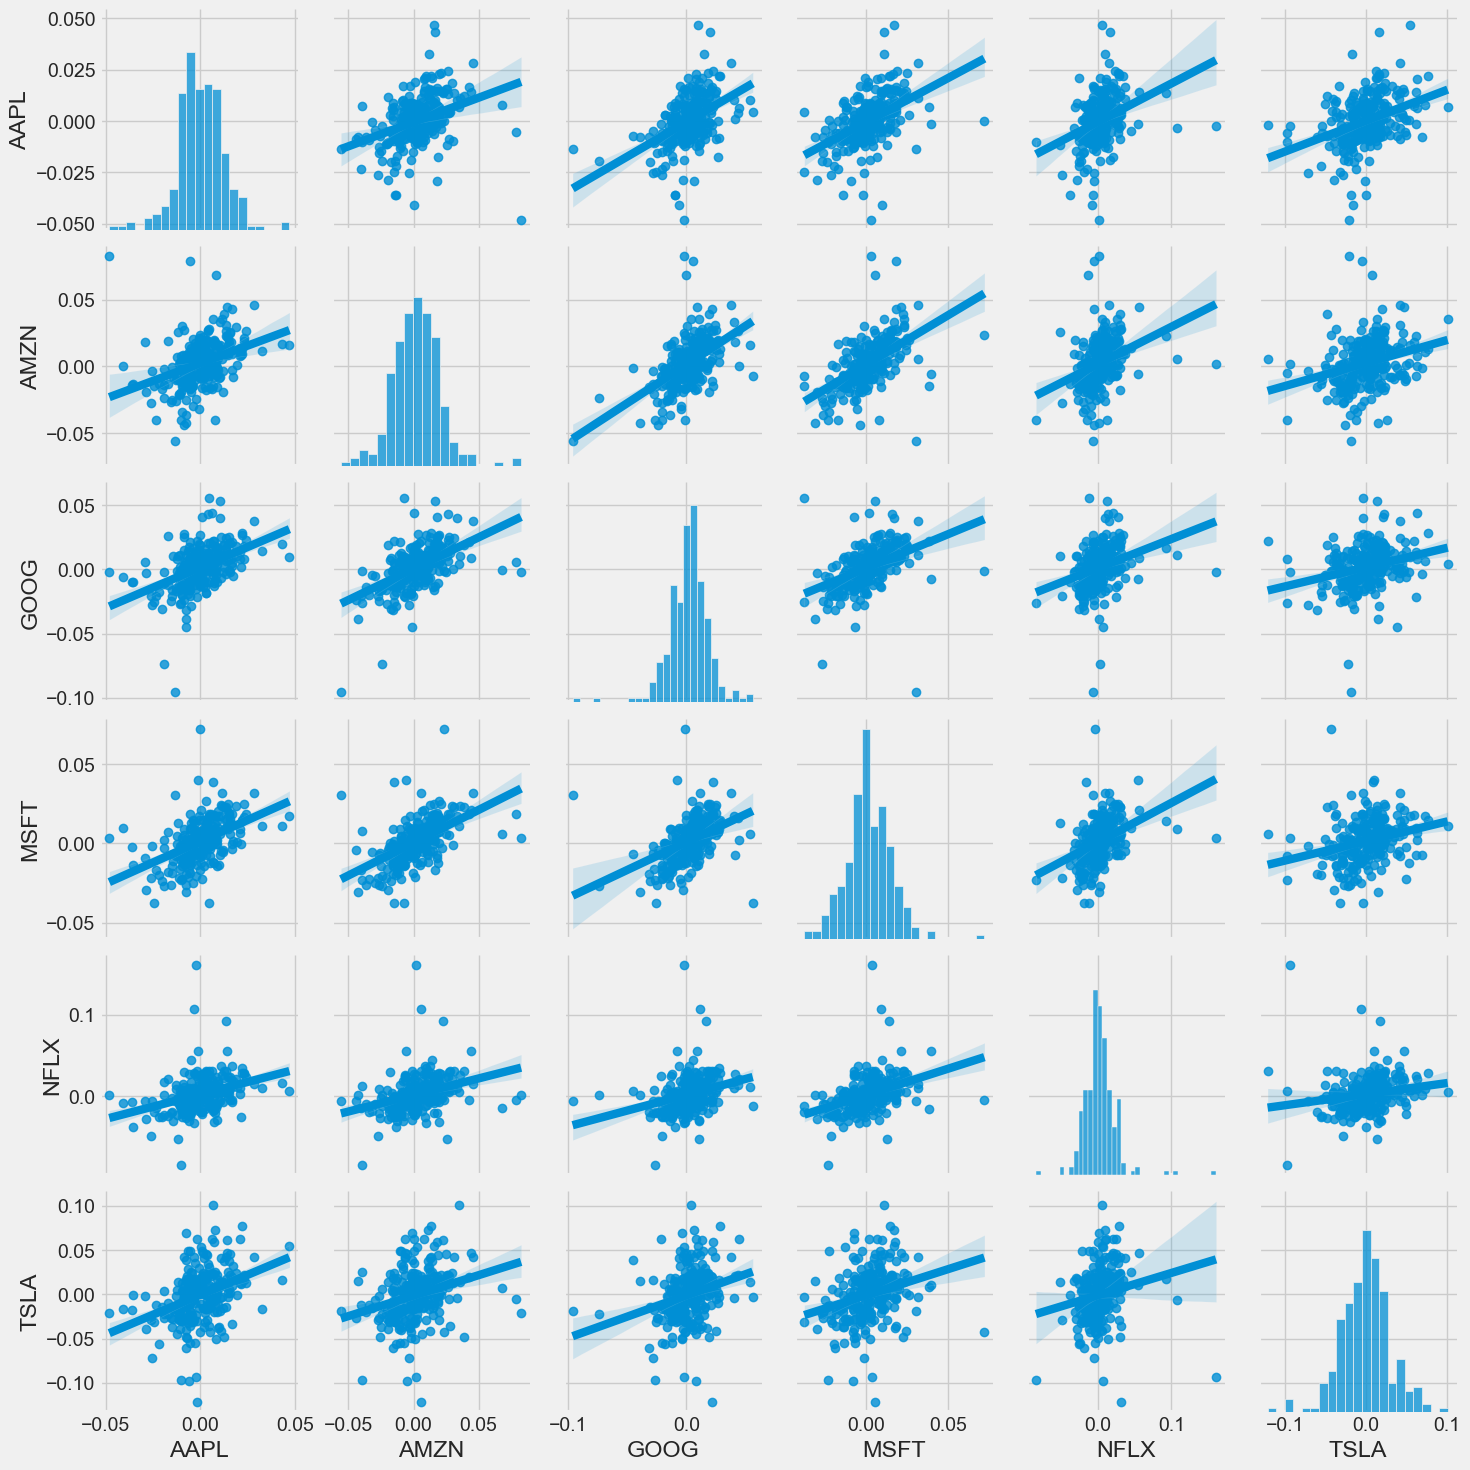

In [28]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis 
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')